为什么计算机用补码存储数据？<br/>
我们知道，计算机只认识0和1，现实世界中的内容，无论是文字、音频、视频等等想要通过计算机存储、计算或者展示，都需要转换二进制。<br/>
那么，最简单的一个数字，想要在计算机中表示出来，就需要通过一定的手段将他转换成二进制。而这种手段我们称之为编码方式。

原码<br/>
相信很多人在上初中的时候都学过很多方式把一个十进制数转成二进制数，比如我们可以很快速的知道10的二进制可以表示成 1010。<br/>
但是初中老师没有告诉我们的是：负10 如何表示呢？<br/>
为了在计算机中想办法表示负数。于是人们想出来一种办法：<br/>
在二进制数值前面增加一位符号位（即最高位为符号位）：正数该位为0，负数该位为1，其余位表示数值的大小。<br/>
这样，如果我们想要10的话，那么就应该是：01010，想要表示-10的话，就应该是11010。<br/>
这种编码方式被称之为原码，原码的优点比较明显，那就是非常的简单直观，很容易被人理解。<br/>
使用原码，解决了十进制在计算机中的存储问题，但是计算机中还有一个重要的操作那就是计算。使用原码如何计算呢？<br/>
首先，原码对于加法的运算是没什么问题的，如5 + 2 ：<br/>
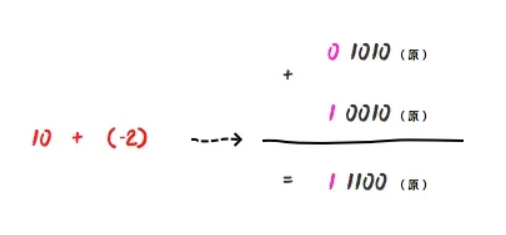
对应的二进制运算：0 0101（原） + 0 0010（原） = 0 0111（原） 其对应的十进制是 7。<br/>
加法没什么问题，那么我们再试着用原码来计算减法，例如我们想要计算10 - 2：<br/>
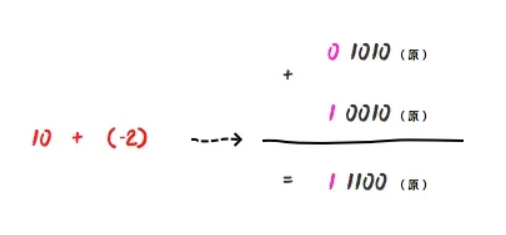
那么就是 0 1010（原） - 0 0010（原） = 0 1000（原），那么这个二进制对应的十进制刚好是8。可见原码计算减法没有问题的？<br/>
但是，以上运算只是我们一厢情愿的算法，其实计算机算术逻辑单元（ALU）并没有直接进行减法运算，对于减法，其实也是用加法器来实现的。<br/>
也就是说，计算机中的所有的减法运算都需要转换成加法运算，那么10 - 2其实就是10 + （-2）：<br/>
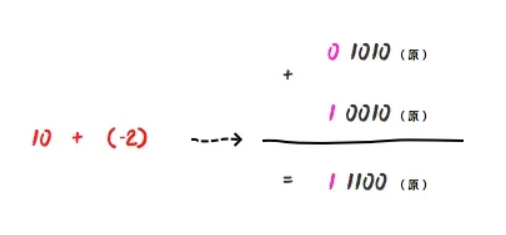
他们的二进制 0 1010(原） + 1 0010(原） = 1 1100(原） ，得到的结果考虑他的符号位的话，这个值是-12，这明显是错误的！！！<br/>
可见，原码虽然对于人类来说是比较简单直观的，但是对于计算机来说却带来了很大的计算难度。

反码<br/>
因为原码虽然容易被人理解，但是给计算机的计算带来了一定的困难，尤其是减法的运算。所以，人们发明出反码来解决减法运算的问题。<br/>
反码是基于原码计算得来的，表示方式是：正数的反码是其本身。负数的反码是在其原码的基础上, 符号位不变，其余各个位取反。<br/>
如，10 的 原码为 0 1010 ，那么他的反码同样也是 0 1010 。<br/>
如，-2 的原码为 1 0010 ，那么他的反码为 1 1101 。<br/>
有了反码之后，二进制的运算就可以带着符号位一起了。并且可以直接将减法转换成加法进行运算。但是使用反码进行运算，需要注意以下几点：<br/>
反码运算时，其符号位与数值一起参加运算。<br/>
反码的符号位相加后，如果有进位出现，则要把它送回到最低位去相加（循环进位）。<br/>
用反码运算，其运算结果亦为反码。在转换为真值时，若符号位为0，数位不变；若符号位为1，应将结果求反才是其真值。<br/>
如 10 - 2 的在计算时需要转成 10 + (-2)进行计算：<br/>
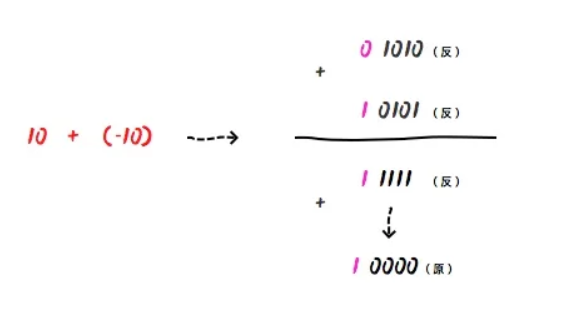
0 1010（反） + 1 1101（反） = 0 0111（反） + 1(进位) = 0 1000 ，因为符号位是0，表示正数，所以他对应的原码也是0 1000（原），则十进制值为8。<br/>
那么，我们再来计算法 2 - 10 ，把2 - 10转换成 2 + （-10）进行计算：<br/>
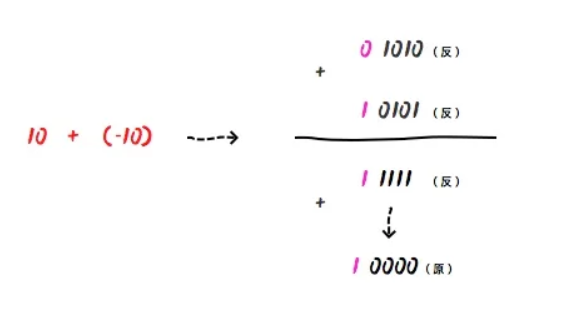
0 0010（反） + 1 0101（反） = 1 0111（反），因为符号位是1，表示负数，所以他对应的原码也是1 1000（原），则十进制为-8。<br/>
以上，我们通过几个例子展示了反码，我们知道使用反码进行计算的时候，可以带着符号位一起计算，只需要在计算之后再将反码转换成原码，再计算其对应的十进制就可以了。<br/>
但是，反码运算还是有一个小问题，我们看一下下面这个例子：<br/>
我们尝试计算10 - 10 ，即 10 + （-10）：<br/>
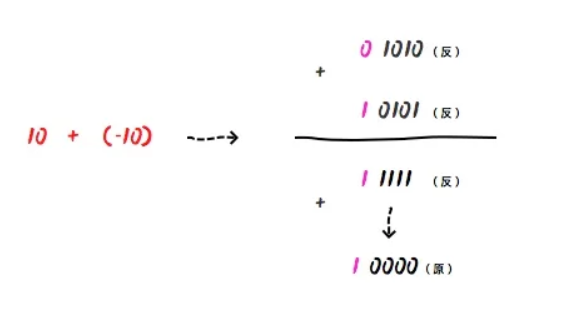
0 1010（反） + 1 0101（反） = 1 1111（反），因为符号位是1，表示负数，所以他对应的原码也是1 0000（原），则十进制为-0。<br/>
虽然很多人够能够理解+0和-0其实是一样的，但是0带符号仍然是没有任何意义的。<br/>
如果一台计算机有8位，我们想要用反码表示0的话，就有0000 0000和 1111 1111两种方式，分别表示+0和-0。<br/>

补码<br/>
虽然反码解决了减法的问题，但是对于0的符号问题却没有解决，于是补码出现了。<br/>
补码是在原码和反码的基础上衍生出来的，补码的表示方法是：正数的补码就是其本身，负数的补码是在其原码的基础上， 符号位不变， 其余各位取反，最后+1。(即在反码的基础上+1)<br/>
补码计算的规则：<br/>
补码运算时，其符号位与数值一起参加运算。<br/>
补码的符号位相加后，如果有进位出现，则进位被舍弃。<br/>
用反码运算，其运算结果亦为补码。在转换成原码时，如果是正数，其补码就是原码；如果是负数，该补码的补码就是其原码。<br/>
我们再来用补码的方式，来计算下10 - 10 ：<br/>
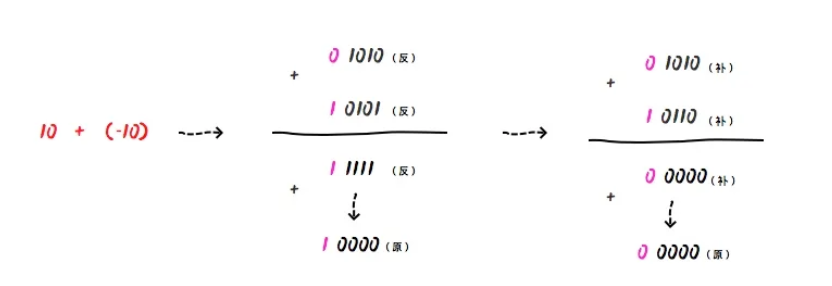
01010（补） + 10110（补） = 0 0000 （补），因为符号位是0，表示正数，所以他对应的原码也是0 0000（原），则十进制为0。<br/>
有了补码，0的表达方式就唯一了，如果是8位的话，那么就是固定的0000 0000。<br/>
如果使用原码或者反码，8位的原码或者反码能表示的最小数字是-127，而使用补码，能表示的最小数字是-128。<br/>
可见，使用补码, 不仅仅修复了0的符号以及存在两个编码的问题, 而且还能够多表示一个最低数。这就是为什么8位二进制, 使用原码或反码表示的范围为[-127, +127], 而使用补码表示的范围为[-128, 127]。<br/>


使用补码的原因总结<br/>
通过以上介绍，我们知道了原码、反码和补码的一些知识，我们尝试着总结下为什么计算机中会最终选择补码来进行存储和计算数字。<br/>
1、计算机的运算器为了实现简单，倾向于在运算过程中将减法转换成加法，统一使用加法运算器进行计算。想要把减法转化成加法运算，就需要在运算时带着符号一起运算，而反码和补码可以带符号位一起运算，也就方便了将减法转换为加法。<br/>
2、采用补码，可以解决编码中有+0和-0两种表示0的方式。<br/>
3、补码表示的数字范围要比原码和反码大。如8位2进制，使用原码或反码表示的范围为[-127, +127], 而使用补码表示的范围为[-128, 127]。<br/>